<a href="https://colab.research.google.com/github/HosseinEyvazi/Vision-AI-Booklet/blob/main/Vision1_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mini-Booklet: Generative vs. Discriminative ML Tasks

\*(now with two “architecture spotlights”) \*

---

### 1. Discriminative Tasks

Focus → **Tell what *is* in an image** (learn p(y | x))

| Typical Task                   | One-Liner Goal       | Image Example                        |
| ------------------------------ | -------------------- | ------------------------------------ |
| **Image Classification**       | assign a label       | Labrador photo → “dog”               |
| **Object Detection**           | draw boxes + labels  | Street scene → cars, pedestrians     |
| **Semantic Segmentation**      | pixel-wise class map | CT slice → tumor vs. tissue          |
| **Pose / Landmark Estimation** | keypoint coordinates | Basketball frame → 17-joint skeleton |
| **Image Quality Assessment**   | predict MOS score    | Compressed JPEG → 4.2/5              |

---

### 2. Generative Tasks

Focus → **Create or transform images** (learn p(x))

| Typical Task                          | One-Liner Goal         | Image Example            |
| ------------------------------------- | ---------------------- | ------------------------ |
| **Image Synthesis (GAN / Diffusion)** | produce novel visuals  | “Cyberpunk city at dusk” |
| **Image-to-Image Translation**        | style / domain swap    | Day → night street       |
| **Super-Resolution**                  | hallucinate detail     | 32×32 face → 512×512     |
| **In-painting / Out-painting**        | fill or extend regions | Restore torn photo       |
| **Style Transfer**                    | blend content & style  | Cat × Van Gogh           |

---

### 3. Architecture Spotlights

| Model                               | Core Idea                                                                                    | Strengths                                                        | Typical Visual Use-Case                                                                  |
| ----------------------------------- | -------------------------------------------------------------------------------------------- | ---------------------------------------------------------------- | ---------------------------------------------------------------------------------------- |
| **U-Net** (2015)                    | “Encoder–decoder with skip connections” – compress, then up-sample while copying fine detail | Precise localization with few data, lightweight                  | Medical and satellite **segmentation**, diffusion-model “noise-predictor” backbones      |
| **Vision Transformer (ViT)** (2020) | Split image into patches → feed to Transformer encoder just like words                       | Scales with data, captures long-range context, flexible backbone | **Classification**, detection, segmentation; ViT-GAN & diffusion variants for generation |

> **Why they matter:**
> *U-Net* bridges low-level IP and high-level CV by combining texture detail from early layers with semantic cues from deep layers.
> *ViT* unifies language-style attention with vision, enabling both discriminative heads (class tokens) and generative decoders (masked-image modeling, diffusion).

---

### 4. Quick Contrast Table

|                       | Discriminative               | Generative                             |
| --------------------- | ---------------------------- | -------------------------------------- |
| **Question answered** | “*What* is in this picture?” | “*Produce/alter* a picture.”           |
| **Common losses**     | Cross-entropy, IoU           | Adversarial, diffusion, reconstruction |
| **Data needs**        | Labeled pairs (x, y)         | Often unlabeled x (self-supervised)    |
| **Example backbone**  | ResNet, **U-Net**, **ViT**   | GANs, Diffusion-UNet, ViT-VQGAN        |

---

### 5. Putting It Together

1. **Hybrid pipelines**: Super-resolution (generative) ⇒ object detection (discriminative) for clearer remote-sensing analytics.
2. **Shared backbones**: Diffusion models frequently embed a *U-Net*; ViT weights pretrained generatively can be fine-tuned discriminatively.
3. **Future trend**: Boundary blurs—models that both *generate* and *judge* images (e.g., diffusion-detectors).

---


### Image‑Pre‑Processing Cheatsheet

*(why we do it → typical real‑world uses)*

| Step                               | Why? (Immediate Goal)                                                                                                                                                                                                     | Example Applications                                                                                                                                                  |
| ---------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1. Resizing / Resampling**       | • Make every image the same H × W expected by the network (e.g., 224 × 224 for ResNet).<br>• Reduce memory / speed up training or inference.                                                                              | • Any CNN or ViT pipeline on mixed‑resolution photo datasets.<br>• Thumbnail generation for web galleries.                                                            |
| **2. Normalization / Scaling**     | • Put pixel values on a common numeric range (0 – 1 or –1 – 1) so gradients don’t explode or vanish.<br>• Often also mean‑subtract & divide by std‑dev per channel.                                                       | • All deep‑learning models (PyTorch `transforms.Normalize`).<br>• Traditional SVM/K‑NN classifiers on raw pixel vectors.                                              |
| **3. Color‑Space Conversion**      | • Switch to a space that’s easier for a task (e.g., RGB → HSV, LAB, or grayscale).<br>• Separate luminance from chroma or isolate reds for blood‑vessel detection.                                                        | • Skin‑tone detection in HSV.<br>• Texture analysis in grayscale.<br>• LAB‑space contrast stretching in photo editors.                                                |
| **4. Data Augmentation**           | • Synthetically enlarge the dataset and add invariances (flips, rotations, crops, jitter, mixup).<br>• Mitigate overfitting on limited labels.                                                                            | • Training object detectors with random crops and photometric noise.<br>• Weakly supervised medical imaging where positives are scarce.                               |
| **5. Noise Reduction / Smoothing** | • Suppress random sensor noise while preserving structure.<br>• Gaussian blur, median filter, bilateral filter.                                                                                                           | • Denoising low‑light smartphone photos.<br>• Pre‑processing for QR/OCR so text isn’t speckled.                                                                       |
| **6. Histogram Equalization**      | • Stretch or flatten the intensity histogram to improve global or adaptive contrast.                                                                                                                                      | • Enhance X‑ray/MRI visibility.<br>• Satellite imagery for better land‑cover discrimination.                                                                          |
| **7. Image Binarization**          | • Convert to pure black & white (thresholding, Otsu, adaptive) to simplify shapes and text.                                                                                                                               | • OCR and document scanning.<br>• Barcode detection.<br>• Industrial part presence/absence checks.                                                                    |
| **8. Edge Detection & Masking**    | **Edge detection:** find strong intensity gradients (Canny, Sobel), producing a map of object boundaries.<br>**Masking:** keep or ignore specific pixel regions using a binary mask (ROI selection, segmentation output). | • Lane‑line extraction in ADAS (edges).<br>• Cropping background with a person‑segmentation mask for virtual meetings (masking).<br>• Feature counting in microscopy. |

**Key idea:** Good pre‑processing matches the *network’s assumptions* and the *task’s signal*. Do only what improves data quality or model generalization—no more, no less.




Image binarization

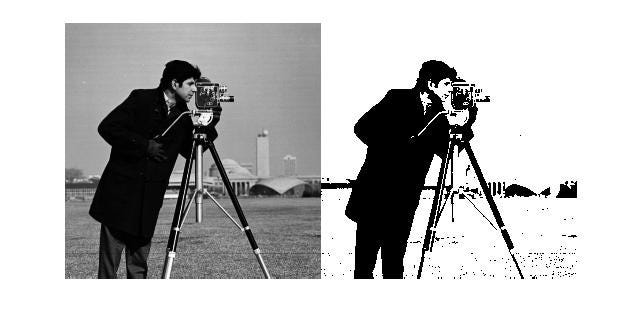

intensity histogram \
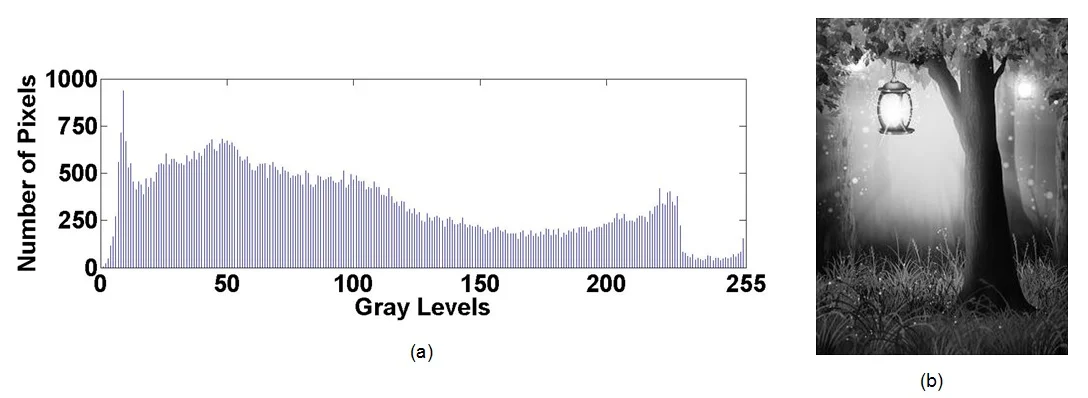

Masking

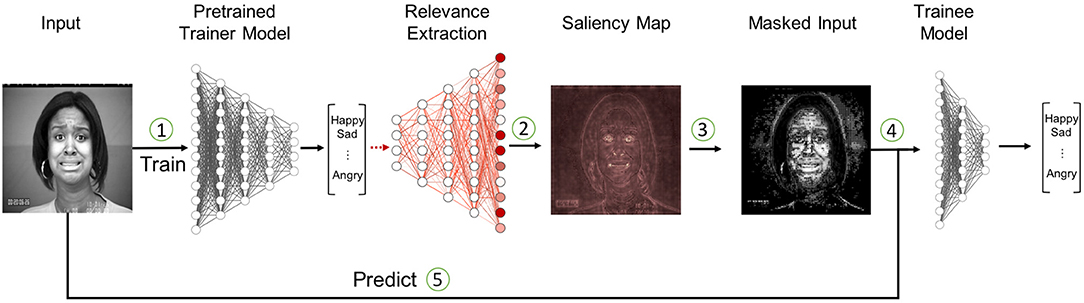

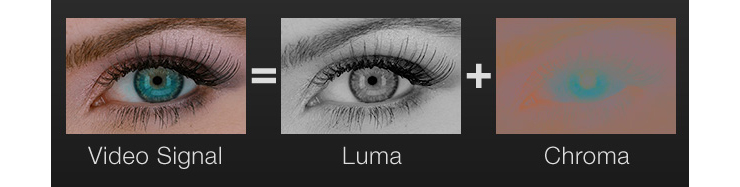

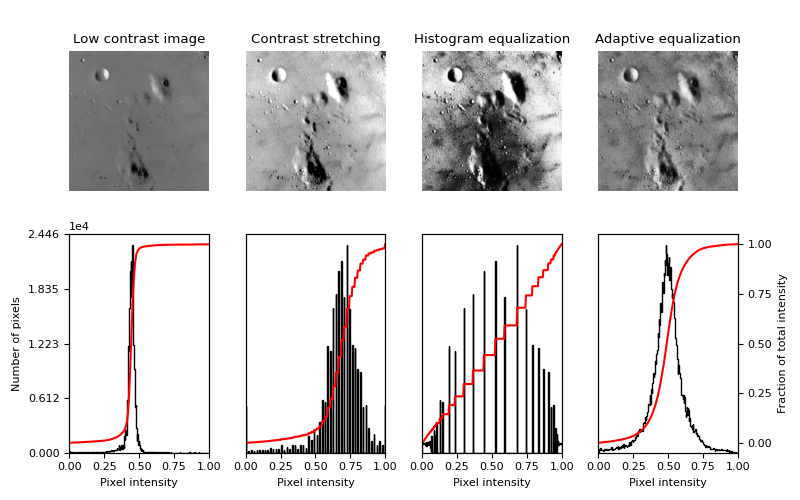

In [ ]:

# Importing essential libraries for numerical computations, data manipulation, and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing TensorFlow and Keras components for building and training deep learning models
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array, array_to_img  # Utilities for image preprocessing
from tensorflow.keras import layers, models, callbacks  # Model components and training callbacks

# Importing PIL's Image module for image processing tasks like drawing and augmentation
from PIL import Image

import cv2  # OpenCV library, often used for video capture, filtering, face detection, etc.


In [ ]:
! wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
! wget https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz

--2025-07-17 06:25:03--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 308 Permanent Redirect
Location: https://thor.robots.ox.ac.uk/pets/images.tar.gz [following]
--2025-07-17 06:25:04--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
Reusing existing connection to thor.robots.ox.ac.uk:443.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  21.4MB/s    in 38s     

2025-07-17 06:25:43 (20.0 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2025-07-17 06:25:43--  https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.o

In [ ]:
!tar -xvzf annotations.tar.gz
!tar -xvzf images.tar.gz


Streaming output truncated to the last 5000 lines.
images/american_bulldog_194.jpg
images/Birman_175.jpg
images/american_bulldog_178.jpg
images/staffordshire_bull_terrier_93.jpg
images/Egyptian_Mau_58.jpg
images/havanese_44.jpg
images/english_cocker_spaniel_97.jpg
images/Ragdoll_111.jpg
images/american_pit_bull_terrier_159.jpg
images/english_setter_134.jpg
images/english_setter_87.jpg
images/wheaten_terrier_198.jpg
images/pug_180.jpg
images/boxer_172.jpg
images/Sphynx_197.jpg
images/german_shorthaired_2.jpg
images/British_Shorthair_9.jpg
images/pug_89.jpg
images/japanese_chin_39.jpg
images/Ragdoll_20.jpg
images/american_bulldog_111.jpg
images/yorkshire_terrier_112.jpg
images/Persian_88.jpg
images/pug_9.jpg
images/Birman_40.jpg
images/British_Shorthair_272.jpg
images/havanese_7.jpg
images/pomeranian_154.jpg
images/beagle_49.jpg
images/British_Shorthair_94.jpg
images/Persian_90.jpg
images/staffordshire_bull_terrier_30.jpg
images/samoyed_113.jpg
images/english_cocker_spaniel_46.jpg
images

| Folder                 | Purpose                        | Task                      |
| ---------------------- | ------------------------------ | ------------------------- |
| `annotations/xmls/`    | Bounding boxes + labels        | **Object detection**      |
| `annotations/trimaps/` | Pixel-wise class masks (1/2/3) | **Semantic segmentation** |

---



trimaps(bg class) and xmls (f ground class)

each image has got a background and a foreground and edge classes (for each pixel)

In [ ]:
import os
from glob import glob

# Define directories
images_dir = 'images/'
masks_dir = 'annotations/trimaps/'

# Get list of all image files (JPGs)
input_img_paths = sorted(glob(os.path.join(images_dir, '*.jpg')))

# Get corresponding mask paths (same filename but .png extension)
target_img_paths = [
    os.path.join(masks_dir, os.path.splitext(os.path.basename(path))[0] + '.png')
    for path in input_img_paths
]

# Check first few
print("Example input image:", input_img_paths[0])
print("Example target mask:", target_img_paths[0])


Example input image: images/Abyssinian_1.jpg
Example target mask: annotations/trimaps/Abyssinian_1.png


Unique values: [1 2 3]


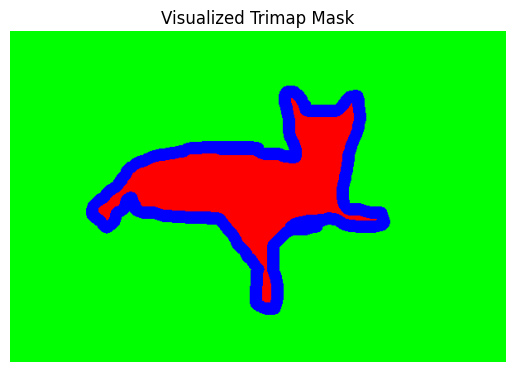

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the trimap PNG as grayscale
mask = Image.open(target_img_paths[0])
mask_np = np.array(mask)

# Optional: visualize unique values
print("Unique values:", np.unique(mask_np))  # Should print [1 2 3]

# Map to color for better visibility # unpacking operator (*)
colored_mask = np.zeros((*mask_np.shape, 3), dtype=np.uint8)
colored_mask[mask_np == 1] = [255, 0, 0]    # Red for pet
colored_mask[mask_np == 2] = [0, 255, 0]    # Green for background
colored_mask[mask_np == 3] = [0, 0, 255]    # Blue for boundary

# Show the image
plt.imshow(colored_mask)
plt.title("Visualized Trimap Mask")
plt.axis('off')
plt.show()


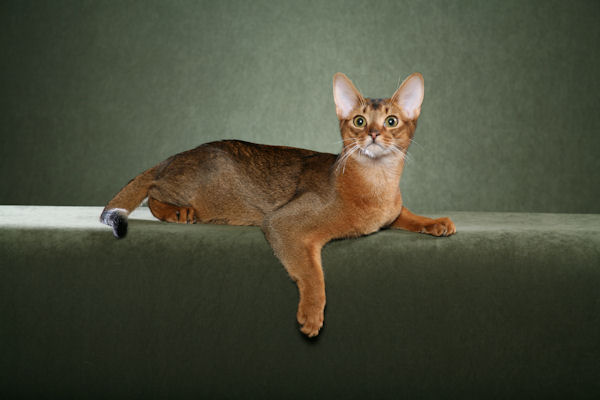

In [ ]:
load_img(input_img_paths[0])

Check that image sizes are equal or not

In [ ]:
# Print shape of the first 10 input images
for i in range(10):
    img_path = input_img_paths[i]
    img = Image.open(img_path)        # Load the image
    img_array = np.array(img)         # Convert to NumPy array
    print(f"{i+1}: {img_path} -> shape: {img_array.shape}")


1: images/Abyssinian_1.jpg -> shape: (400, 600, 3)
2: images/Abyssinian_10.jpg -> shape: (500, 375, 3)
3: images/Abyssinian_100.jpg -> shape: (500, 394, 3)
4: images/Abyssinian_101.jpg -> shape: (313, 450, 3)
5: images/Abyssinian_102.jpg -> shape: (465, 500, 3)
6: images/Abyssinian_103.jpg -> shape: (351, 500, 3)
7: images/Abyssinian_104.jpg -> shape: (363, 600, 3)
8: images/Abyssinian_105.jpg -> shape: (375, 500, 3)
9: images/Abyssinian_106.jpg -> shape: (1024, 1536, 3)
10: images/Abyssinian_107.jpg -> shape: (448, 500, 3)


Note that the 3rd dimension shows the number of channels (all are RGB)

In [ ]:
from PIL import Image
import numpy as np

def load_image_pair(input_path, target_path, size=(200, 200)):
    # Load and resize the input image
    input_img = Image.open(input_path).convert('RGB').resize(size)
    input_array = np.array(input_img)

    # Load and resize the target mask (segmentation)
    target_img = Image.open(target_path).resize(size, resample=Image.NEAREST)
    target_array = np.array(target_img)

    # Convert from [1,2,3] to [0,1,2]
    target_array = target_array - 1

    return input_array, target_array




**Note:**
This is a **generative task**, not a discriminative one.

In this context, the model is learning to **generate a pixel-wise segmentation map** (the target image) from an input image. Rather than predicting a single class label (as in classification), it outputs a **structured image** where each pixel represents a class (foreground, background, or boundary).

This makes it a **dense prediction** problem typical of generative models like **U-Net** or **Fully Convolutional Networks (FCNs)**, which produce outputs of the same spatial dimensions as the input.


### 🔹 U-Net (Concise Explanation, with **Encoder** & **Decoder** Defined)

**U-Net** is a convolution-based neural network for **semantic segmentation**, assigning a class label to every pixel.

---

#### 🏗️  Two Main Parts

| Part                                 | What it *does*                                                              | How it works in U-Net                                                                                                                                                                                                                                                     |
| ------------------------------------ | --------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Encoder** <br>(“contracting path”) | **Learns context** & high-level features while **shrinking** spatial size.  | Repeated blocks of **Conv → ReLU → Conv → ReLU → MaxPool**. Each MaxPool halves width × height, increasing channels so the network captures *what* is in the image, not *where* in high detail.                                                                           |
| **Decoder** <br>(“expanding path”)   | **Rebuilds spatial resolution** and produces the final per-pixel class map. | Each step: **Up-convolution / upsampling** to double width × height, then **concatenate** with the saved feature map from the matching encoder layer (skip connection), followed by two Conv → ReLU layers. This lets the decoder blend coarse context with fine details. |

---

#### 🔁 Skip Connections (How They Fit)

* The encoder **outputs** a feature map at every depth; that map is **stored**.
* When the decoder upsamples to the same spatial size, the stored encoder map is **concatenated** with the decoder’s upsampled tensor.
* Thus the **decoder layer** receives *two* inputs (upsampled features + encoder features).
  The **encoder** itself still outputs only one tensor; it does **not** consume two inputs.

---

#### ✅ Why It Matters

1. **Fine-detail recovery:** Skip connections restore high-resolution edges lost during pooling.
2. **Accurate pixel labels:** Combines global context (deep layers) with local detail (shallow layers).
3. **Data efficiency:** Performs well even with small training sets—one reason it is popular in medical imaging, microscopy, and satellite imagery.
`

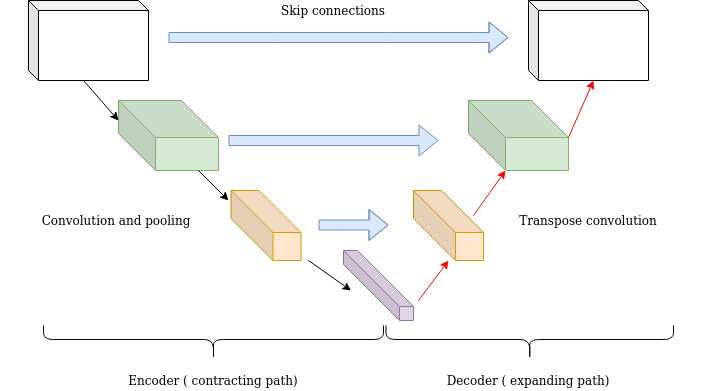

### Transposed Convolution
<img src="https://towardsdatascience.com/wp-content/uploads/2022/06/1YwVviBiy2qAp0CwS5CDwmA.gif" width="400">


In [ ]:
from tensorflow.keras import layers, models, Input

def unet_model(input_shape=(200, 200, 3), num_classes=3):
    # Input layer: RGB image of shape 200x200
    inputs = Input(shape=input_shape)

    # --- Encoder (Downsampling path) ---
    # Each block: 2 Conv layers + MaxPooling to reduce size
    c1 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D(pool_size=(2, 2))(c1)  # Output: 100x100

    c2 = layers.Conv2D(64, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D(pool_size=(2, 2))(c2)  # Output: 50x50

    # --- Bottleneck ---
    # Deepest layer — captures the most abstract features
    b = layers.Conv2D(128, 3, activation='relu', padding='same')(p2)
    b = layers.Conv2D(128, 3, activation='relu', padding='same')(b)

    # --- Decoder (Upsampling path) ---
    # Each block: TransposeConv (upsample) + skip connection + Conv layers

    # Upsample to match c2, then concatenate (skip connection)
    u1 = layers.Conv2DTranspose(64, 2, strides=2, padding='same')(b)  # Output: 100x100
    u1 = layers.concatenate([u1, c2])  # Skip connection from encoder
    c3 = layers.Conv2D(64, 3, activation='relu', padding='same')(u1)
    c3 = layers.Conv2D(64, 3, activation='relu', padding='same')(c3)

    # Upsample to match c1, then concatenate (skip connection)
    u2 = layers.Conv2DTranspose(32, 2, strides=2, padding='same')(c3)  # Output: 200x200
    u2 = layers.concatenate([u2, c1])
    c4 = layers.Conv2D(32, 3, activation='relu', padding='same')(u2)
    c4 = layers.Conv2D(32, 3, activation='relu', padding='same')(c4)

    # --- Output layer ---
    # 1x1 convolution to reduce to desired number of classes per pixel
    outputs = layers.Conv2D(num_classes, 1, activation='softmax')(c4)

    # Create model
    model = models.Model(inputs, outputs, name="Simple_U-Net")
    return model


In [ ]:
model = unet_model()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use this if masks are integers (0, 1, 2)
    metrics=['accuracy']
)

model.summary()


Model: "Simple_U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 200, 200,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 200, 200,  │      9,248 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 100, 100,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 100, 100,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 100, 100,  │     36,928 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 50, 50,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 50, 50,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 50, 50,    │    147,584 │ conv2d_4[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 100, 100,  │     32,832 │ conv2d_5[0][0]    │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 100, 100,  │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 128)              │            │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 100, 100,  │     73,792 │ concatenate[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 100, 100,  │     36,928 │ conv2d_6[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 200, 200,  │      8,224 │ conv2d_7[0][0]    │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 200, 200,  │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 64)               │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 200, 200,  │     18,464 │ concatenate_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 200, 200,  │      9,248 │ conv2d_8[0][0]  

 Total params: 466,595 (1.78 MB)

 Trainable params: 466,595 (1.78 MB)

 Non-trainable params: 0 (0.00 B)


### 🔁 What is Transposed Convolution?

* **Transposed convolution** is used to **increase** the spatial size of a feature map (e.g., from 2×2 → 4×4).
* The `stride` determines **how much you upsample**.

---

### 🔢 Simple Example

Let’s say you have a **2×2 input**, and you apply a **transposed convolution** with:

* **Kernel size** = 3
* **Stride** = 2
* **Padding** = 'valid' (no padding)

#### Input:

```
[ [1, 2],
  [3, 4] ]
```

---

### 🔧 What happens with stride=2

Each input value will be **spread out** with gaps between them. Conceptually, this is like inserting zeros:

```
[ [1, 0, 2],
  [0, 0, 0],
  [3, 0, 4] ]
```

Then a convolution kernel slides over this **upsampled grid**, performing weighted sums, just like a normal convolution.

---

### 📐 Resulting Output Size

For **transposed conv**, output size is approximately:

```
output_size = (input_size - 1) * stride + kernel_size
```

So with:

* `input_size = 2`
* `stride = 2`
* `kernel_size = 3`

→ `output_size = (2 - 1) * 2 + 3 = 5`

So you get a **5×5 output** from a 2×2 input.

---

### 🧠 Summary:

| Stride | What it does (in transposed conv)          |
| ------ | ------------------------------------------ |
| `1`    | Keeps size same as regular conv            |
| `2`    | Doubles the spatial size (e.g., 2×2 → 4×4) |
| `n`    | Upsamples by a factor of `n`               |



In [ ]:

# Function to load & process one pair (paths)
def map_fn(input_path, target_path, img_size=(200,200)):
    # Read & decode input image
    img = tf.io.read_file(input_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, img_size)
    img = tf.cast(img, tf.float32) / 255.0

    # Read & decode mask
    mask = tf.io.read_file(target_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, img_size, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    mask = tf.cast(mask, tf.uint8) - 1  # Map {1,2,3} → {0,1,2}

    return img, mask




In [ ]:
from sklearn.model_selection import train_test_split

# ✅ Split input and target paths into training and test sets
# This creates two aligned sets: one for training, one for testing
train_input, test_input, train_target, test_target = train_test_split(
    input_img_paths, target_img_paths, test_size=0.2, random_state=42
)



# ✅ Create the training dataset pipeline
train_dataset = tf.data.Dataset.from_tensor_slices((train_input, train_target))  # Pair paths
train_dataset = train_dataset.map(map_fn, num_parallel_calls=tf.data.AUTOTUNE)  # Apply preprocessing
train_dataset = train_dataset.shuffle(100)  # Shuffle examples for training randomness
train_dataset = train_dataset.batch(8)  # Group into batches of 8
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)  # Load next batch while training current --> leads to higher speed

# ✅ Create the test dataset pipeline (no shuffle)
test_dataset = tf.data.Dataset.from_tensor_slices((test_input, test_target))  # Pair paths
test_dataset = test_dataset.map(map_fn, num_parallel_calls=tf.data.AUTOTUNE)  # Apply preprocessing
test_dataset = test_dataset.batch(8)  # Batch only
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)  # Improve performance

In [ ]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # use categorical_crossentropy if one-hot
    metrics=['accuracy']
)


| Loss Function                     | Target Format          | Use Case                              |
| --------------------------------- | ---------------------- | ------------------------------------- |
| `categorical_crossentropy`        | One-hot encoded labels | Use if targets are `[0, 1, 0]` etc.   |
| `sparse_categorical_crossentropy` | Integer labels         | Use if targets are `0`, `1`, `2`, ... |


❗ Important: \

When using categorical_crossentropy, your model's last layer must output softmax, and targets must be one-hot encoded. \


When using sparse_categorical_crossentropy, you still use softmax in the final layer, but labels can stay as integers.



In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ✅ Define callbacks

# Save the best model (based on validation loss)
checkpoint_cb = ModelCheckpoint(
    "best_unet_oxford.h5",               # Output filename
    monitor="val_loss",                  # Track validation loss
    save_best_only=True,                 # Only save best version
    verbose=1
)

# Stop training early if validation loss doesn't improve
earlystop_cb = EarlyStopping(
    monitor="val_loss",
    patience=5,                          # Wait 5 epochs without improvement
    restore_best_weights=True,           # Restore best model weights
    verbose=1
)

# ✅ Train the model
history = model.fit(
    train_dataset,                       # Your tf.data.Dataset for training
    validation_data=test_dataset,        # Your tf.data.Dataset for validation
    epochs=15,                           # You can adjust this as needed
    callbacks=[checkpoint_cb, earlystop_cb]
)


Epoch 1/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8194 - loss: 0.4543
Epoch 1: val_loss improved from inf to 0.46948, saving model to best_unet_oxford.h5


739/739 ━━━━━━━━━━━━━━━━━━━━ 56s 75ms/step - accuracy: 0.8194 - loss: 0.4543 - val_accuracy: 0.8108 - val_loss: 0.4695
Epoch 2/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8225 - loss: 0.4487
Epoch 2: val_loss improved from 0.46948 to 0.43700, saving model to best_unet_oxford.h5


739/739 ━━━━━━━━━━━━━━━━━━━━ 54s 72ms/step - accuracy: 0.8225 - loss: 0.4486 - val_accuracy: 0.8258 - val_loss: 0.4370
Epoch 3/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8263 - loss: 0.4379
Epoch 3: val_loss did not improve from 0.43700
739/739 ━━━━━━━━━━━━━━━━━━━━ 54s 72ms/step - accuracy: 0.8263 - loss: 0.4379 - val_accuracy: 0.8185 - val_loss: 0.4546
Epoch 4/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8328 - loss: 0.4242
Epoch 4: val_loss improved from 0.43700 to 0.43191, saving model to best_unet_oxford.h5


739/739 ━━━━━━━━━━━━━━━━━━━━ 82s 72ms/step - accuracy: 0.8328 - loss: 0.4242 - val_accuracy: 0.8271 - val_loss: 0.4319
Epoch 5/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8389 - loss: 0.4100
Epoch 5: val_loss improved from 0.43191 to 0.41849, saving model to best_unet_oxford.h5


739/739 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - accuracy: 0.8389 - loss: 0.4100 - val_accuracy: 0.8347 - val_loss: 0.4185
Epoch 6/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8440 - loss: 0.3964
Epoch 6: val_loss did not improve from 0.41849
739/739 ━━━━━━━━━━━━━━━━━━━━ 83s 72ms/step - accuracy: 0.8440 - loss: 0.3964 - val_accuracy: 0.8323 - val_loss: 0.4234
Epoch 7/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8452 - loss: 0.3934
Epoch 7: val_loss improved from 0.41849 to 0.41401, saving model to best_unet_oxford.h5


739/739 ━━━━━━━━━━━━━━━━━━━━ 53s 72ms/step - accuracy: 0.8452 - loss: 0.3934 - val_accuracy: 0.8365 - val_loss: 0.4140
Epoch 8/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8461 - loss: 0.3916
Epoch 8: val_loss did not improve from 0.41401
739/739 ━━━━━━━━━━━━━━━━━━━━ 53s 71ms/step - accuracy: 0.8461 - loss: 0.3916 - val_accuracy: 0.8275 - val_loss: 0.4319
Epoch 9/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8501 - loss: 0.3819
Epoch 9: val_loss improved from 0.41401 to 0.39074, saving model to best_unet_oxford.h5


739/739 ━━━━━━━━━━━━━━━━━━━━ 54s 72ms/step - accuracy: 0.8501 - loss: 0.3819 - val_accuracy: 0.8461 - val_loss: 0.3907
Epoch 10/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8526 - loss: 0.3765
Epoch 10: val_loss did not improve from 0.39074
739/739 ━━━━━━━━━━━━━━━━━━━━ 81s 71ms/step - accuracy: 0.8526 - loss: 0.3765 - val_accuracy: 0.8480 - val_loss: 0.3926
Epoch 11/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8560 - loss: 0.3683
Epoch 11: val_loss did not improve from 0.39074
739/739 ━━━━━━━━━━━━━━━━━━━━ 88s 79ms/step - accuracy: 0.8560 - loss: 0.3683 - val_accuracy: 0.8441 - val_loss: 0.3937
Epoch 12/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8577 - loss: 0.3635
Epoch 12: val_loss did not improve from 0.39074
739/739 ━━━━━━━━━━━━━━━━━━━━ 76s 71ms/step - accuracy: 0.8577 - loss: 0.3635 - val_accuracy: 0.8390 - val_loss: 0.4129
Epoch 13/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8589 - loss: 0.3608
Epoch 13: val_loss did not i

739/739 ━━━━━━━━━━━━━━━━━━━━ 53s 71ms/step - accuracy: 0.8608 - loss: 0.3556 - val_accuracy: 0.8513 - val_loss: 0.3790
Epoch 15/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8610 - loss: 0.3553
Epoch 15: val_loss improved from 0.37904 to 0.37482, saving model to best_unet_oxford.h5


739/739 ━━━━━━━━━━━━━━━━━━━━ 83s 73ms/step - accuracy: 0.8610 - loss: 0.3553 - val_accuracy: 0.8524 - val_loss: 0.3748
Restoring model weights from the end of the best epoch: 15.




Let’s say:

* Input shape: `(batch_size, 200, 200, 3)`
* Final output: `(batch_size, 200, 200, 3)`

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


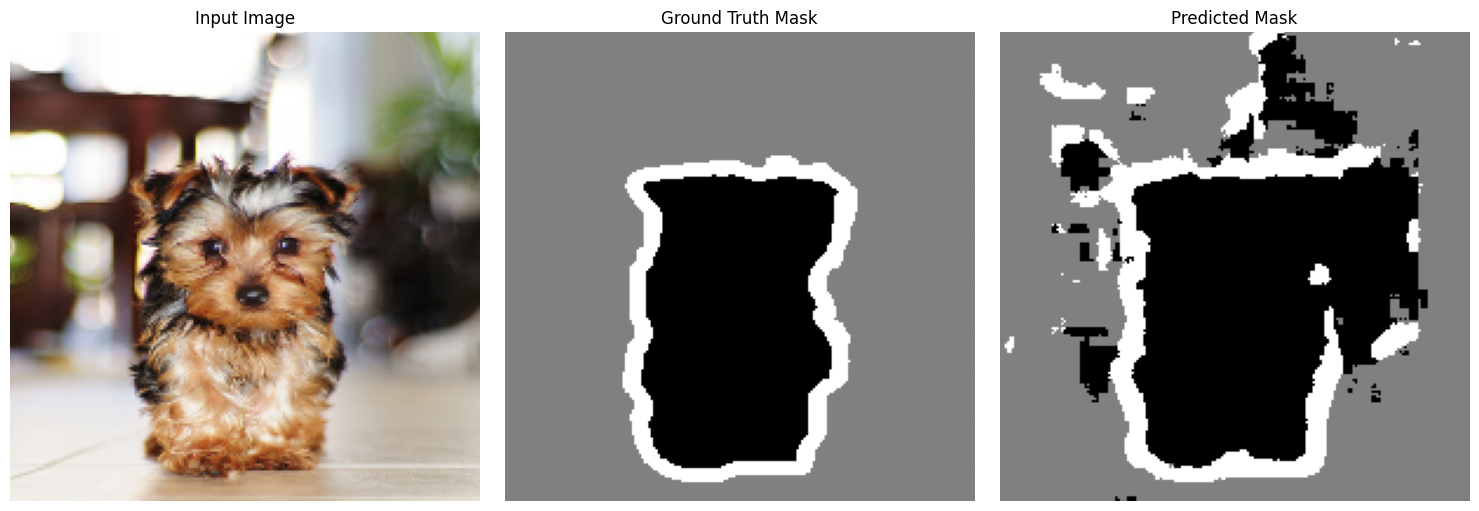

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch from test dataset
for image_batch, mask_batch in test_dataset.take(1):
    image = image_batch[0]        # First image in the batch
    true_mask = mask_batch[0]     # Corresponding true mask
    break

# Expand dimensions to make it (1, height, width, channels)
input_for_model = tf.expand_dims(image, axis=0)

# Predict mask
predicted = model.predict(input_for_model)
pred_mask = tf.argmax(predicted[0], axis=-1)   # Take the class with highest probability
pred_mask = pred_mask.numpy()                  # Convert to NumPy array

# Plot input, ground truth, and prediction
plt.figure(figsize=(15, 5))

# Input Image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Input Image")
plt.axis('off')

# Ground Truth Mask
plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(true_mask), cmap='gray')
plt.title("Ground Truth Mask")
plt.axis('off')

# Predicted Mask
plt.subplot(1, 3, 3)
plt.imshow(pred_mask, cmap='gray')
plt.title("Predicted Mask")
plt.axis('off')

plt.tight_layout()
plt.show()
